# Categorical Variable  Patterns 
Generalized Function

In [2]:
import pandas as pd
import numpy as np
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [14]:
db = pd.read_csv('clean_data_complete.csv')
univ = pd.read_csv('universities.csv',  encoding ='ISO-8859-1')
cars = pd.read_csv('car-vgood-5-1tra.csv')

In [19]:
cars

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,negative
1,vhigh,vhigh,2,2,small,med,negative
2,vhigh,vhigh,2,2,small,high,negative
3,vhigh,vhigh,2,2,med,low,negative
4,vhigh,vhigh,2,2,med,med,negative
...,...,...,...,...,...,...,...
1377,low,low,5more,more,med,low,negative
1378,low,low,5more,more,med,med,negative
1379,low,low,5more,more,med,high,positive
1380,low,low,5more,more,big,med,negative


In [23]:
def cat_plot_variable(db, target, target_val, variables, pattern_title, pal="pastel"):
    sns.set(rc={'figure.figsize':(20,11)})
    tar_var = []
    res_var =[]
    for tar, val in variables:
        res_var.append(val)
        tar_var.append(tar)
    for element in range(len(tar_var)): 
        if len(db[tar_var[element]].value_counts()) > 5: 
            db[tar_var[element]][(db[tar_var[element]] != res_var[element])] = 'otro'
    if len(variables) == 1: 
        chart = sns.factorplot(
            data=db,
            x=target,
            kind = 'count',
            hue = tar_var[0],
            margin_titles  = True,
            ci = None, aspect = 2,
            palette=pal,
            edgecolor=".6"
            )
    elif len(variables) == 2: 
        chart = sns.factorplot(
        data=db,
        x=target,
        kind = 'count',
        hue = tar_var[0],
        col = tar_var[1],
        margin_titles  = True,
        ci = None, aspect = 1,
        palette=pal,
        edgecolor=".6"
        )
    elif len(variables) == 3: 
        chart = sns.factorplot(
        data=db,
        x=target,
        kind = 'count',
        hue = tar_var[0],
        col = tar_var[1],
        row = tar_var[2],
        margin_titles  = True,
        ci = None, aspect = 1,
        palette=pal,
        edgecolor=".6"
        )
    chart.set_xticklabels( rotation=45, horizontalalignment='right')
    (chart.set_axis_labels(target)
    .set_titles("{col_name} {col_var}")
    .despine(left=True))
    plt.subplots_adjust(top=0.8)
    chart.fig.suptitle(f'Pattern: {pattern_title}, \n Target: {target} = {target_val}')
    return plt.show()

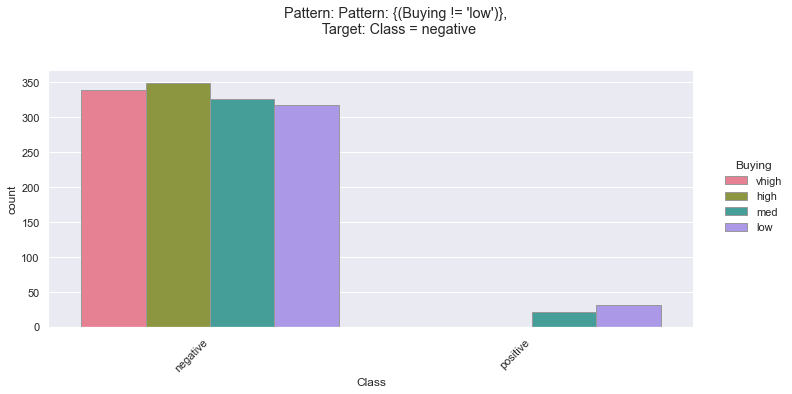

In [24]:
pattern_title = "Pattern: {(Buying != 'low')}"
variables = [('Buying','low')]
target = 'Class'
target_val = 'negative'
cat_plot_variable(cars, target,  target_val, variables,  pattern_title, pal = 'husl')

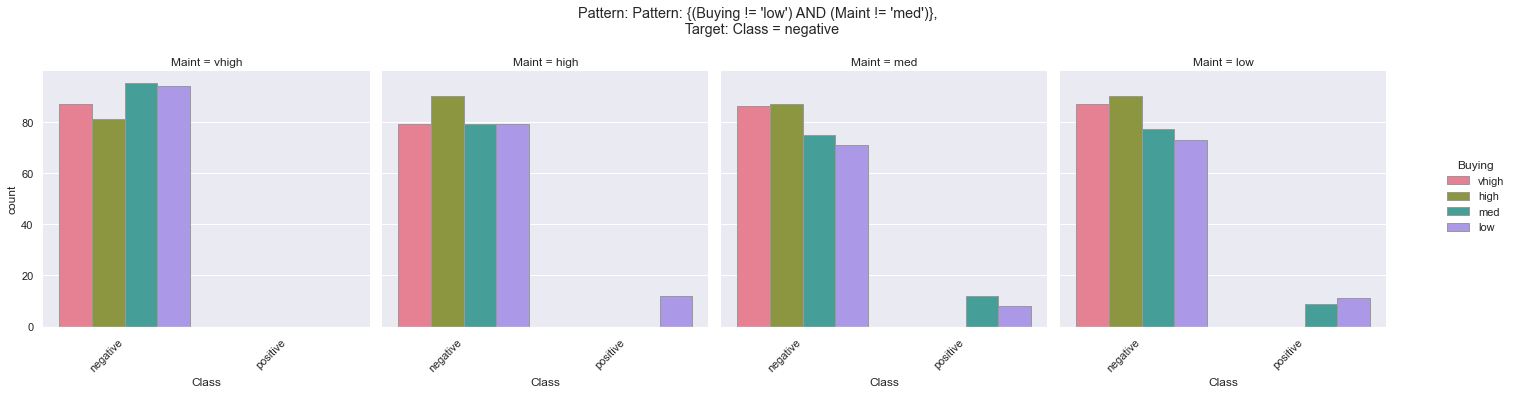

In [25]:
pattern_title = "Pattern: {(Buying != 'low') AND (Maint != 'med')}"
variables = [('Buying','low'),('Maint' , 'med')]
target = 'Class'
target_val = 'negative'
cat_plot_variable(cars, target,  target_val, variables,  pattern_title, pal = 'husl')

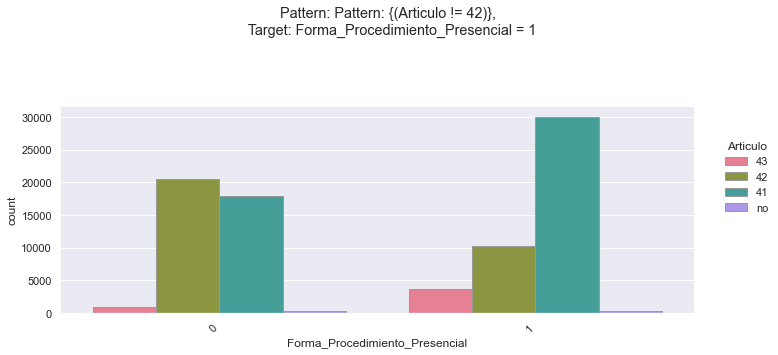

In [145]:
pattern_title = "Pattern: {(Articulo != 42)}"
variables = [('Articulo','42')]
target = 'Forma_Procedimiento_Presencial'
target_val = '1'
cat_plot_variable(db, target,  target_val, variables,  pattern_title, pal = 'husl')

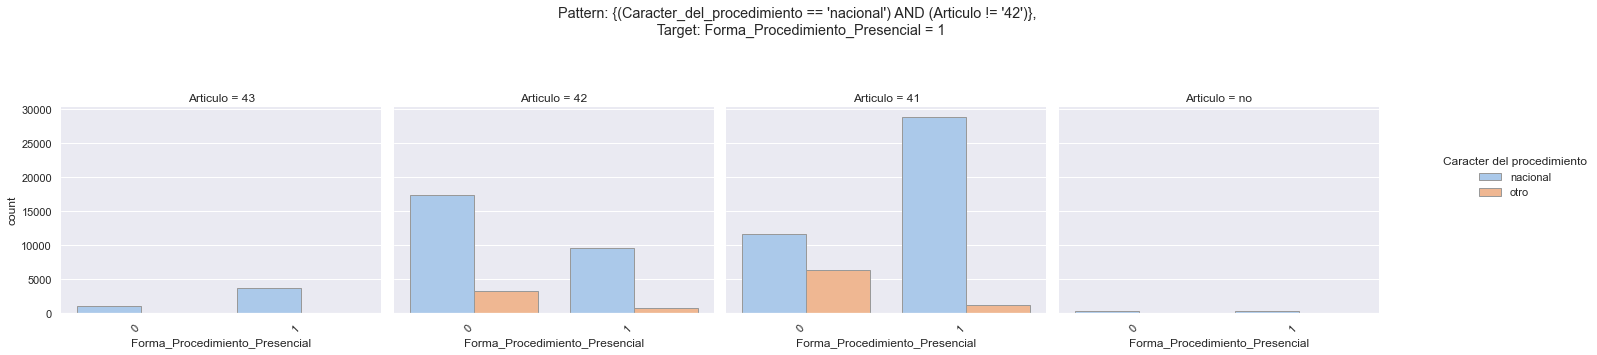

In [146]:
pattern_title = "{(Caracter_del_procedimiento == 'nacional') AND (Articulo != '42')}"
variables = [('Caracter del procedimiento','nacional'),('Articulo','42')]
target = 'Forma_Procedimiento_Presencial'
target_val = '1'
cat_plot_variable(db, target,  target_val, variables,  pattern_title, pal = 'pastel')


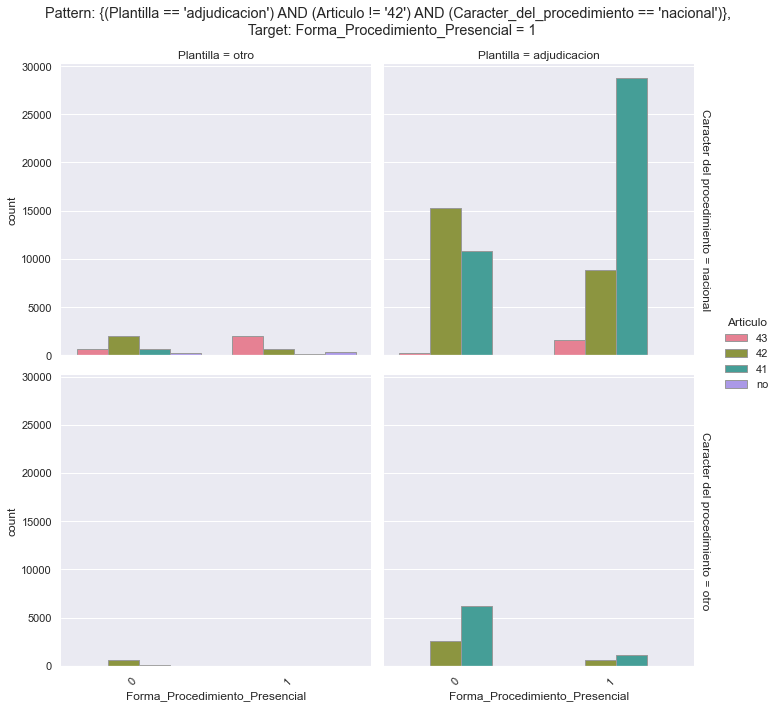

In [152]:
pattern_title = "{(Plantilla == 'adjudicacion') AND (Articulo != '42') AND (Caracter_del_procedimiento == 'nacional')}"
variables = [('Articulo','42'),('Plantilla','adjudicacion') ,('Caracter del procedimiento','nacional')]
target = 'Forma_Procedimiento_Presencial'
target_val = '1'
cat_plot_variable(db, target,  target_val, variables,  pattern_title, pal = 'husl')

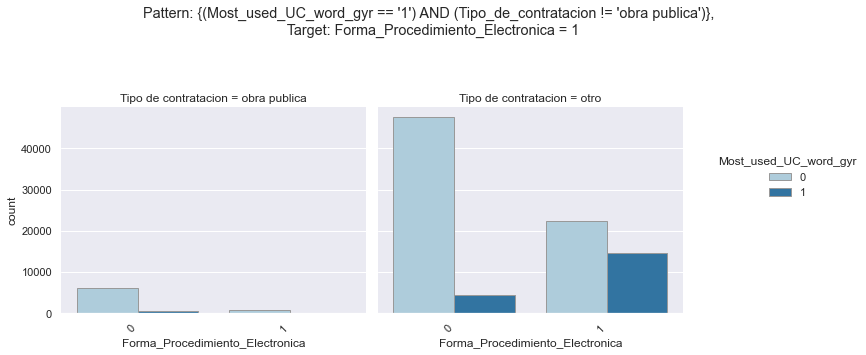

In [149]:

pattern_title = "{(Most_used_UC_word_gyr == '1') AND (Tipo_de_contratacion != 'obra publica')}"
variables = [('Most_used_UC_word_gyr','1'),('Tipo de contratacion','obra publica')]
target = 'Forma_Procedimiento_Electronica'
target_val = '1'
cat_plot_variable(db, target,  target_val, variables,  pattern_title, pal = "Paired")

In [ ]:
# Universidades base : 
